# Data Analysis - tips with Python

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the built-in dataset from Seaborn
df = sns.load_dataset('tips')

In [2]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

**What we've learnt**


244 entries and 7 columns. Notably, the dataset features categorical variables, such as 'sex', 'smoker', 'day', and 'time', which provide unique information about customer characteristics and dining preferences. By generating summary statistics, we uncovered key statistical measures such as means, medians, and quartiles for numerical columns like 'total_bill', 'tip', and 'size'. Moreover, our thorough data inspection revealed an absence of missing values, setting a solid foundation for accurate analyses

Text(0, 0.5, 'Tip Amount')

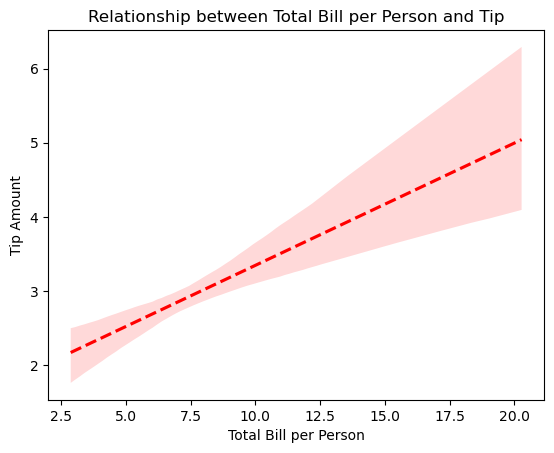

In [7]:
# Calculate total bill per person
df['total_per_person'] = df['total_bill'] / df['size']

# Visualise the relationship between total_per_person and tip using Seaborn
sns.regplot(x='total_per_person', y='tip', data=df, scatter=False, line_kws={"color": "red", "linestyle": "--"})

# Customise the plot aesthetics
plt.title('Relationship between Total Bill per Person and Tip')
plt.xlabel('Total Bill per Person')
plt.ylabel('Tip Amount')

# This shows as the total bill per person increases, the tip amount also tends to increase


Text(0.5, 1.02, 'Pair Plot of Numerical Variables')

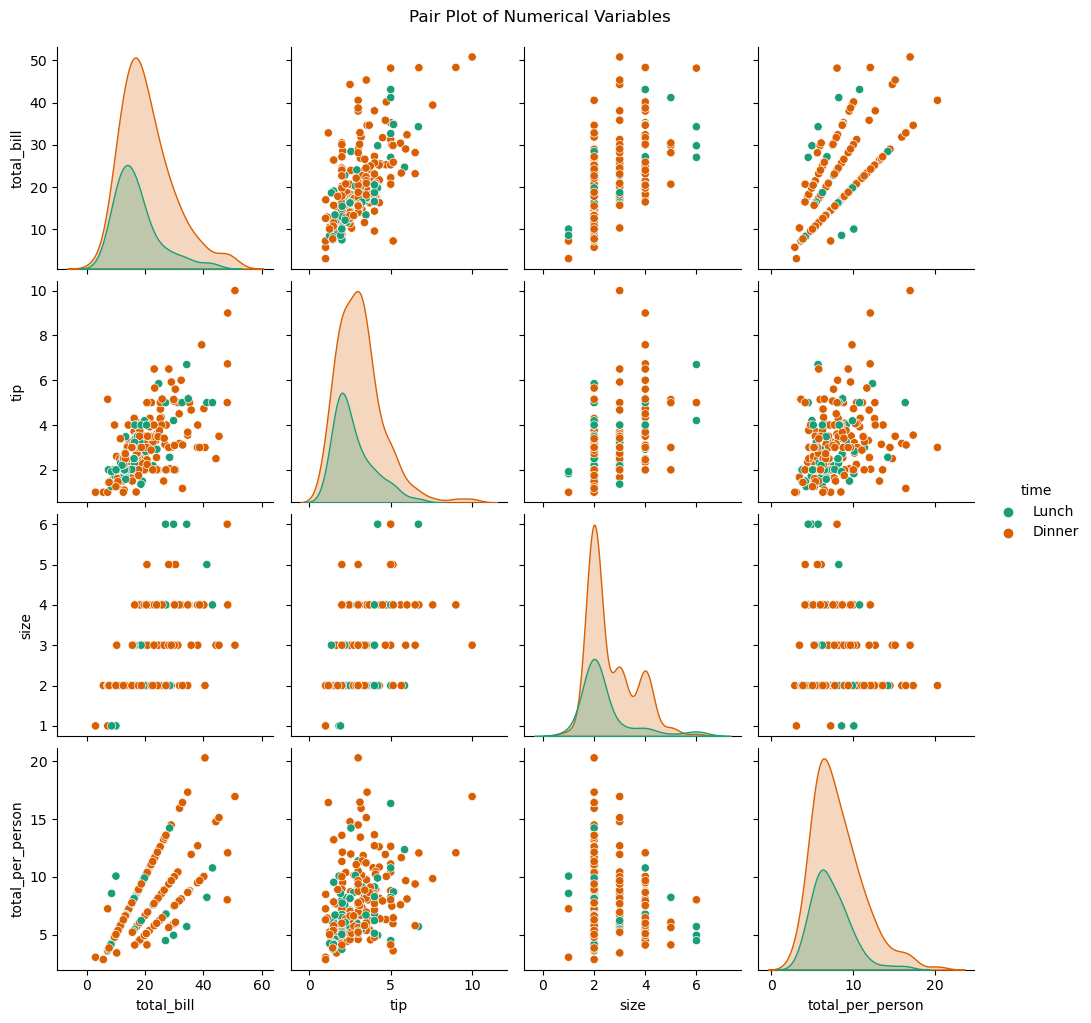

In [8]:
# Pair plot to visualise relationships between numerical variables, with hue based on time
sns.pairplot(df, hue='time', palette='Dark2')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)


C:\Users\geeso\AppData\Local\Temp\ipykernel_17692\757076107.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


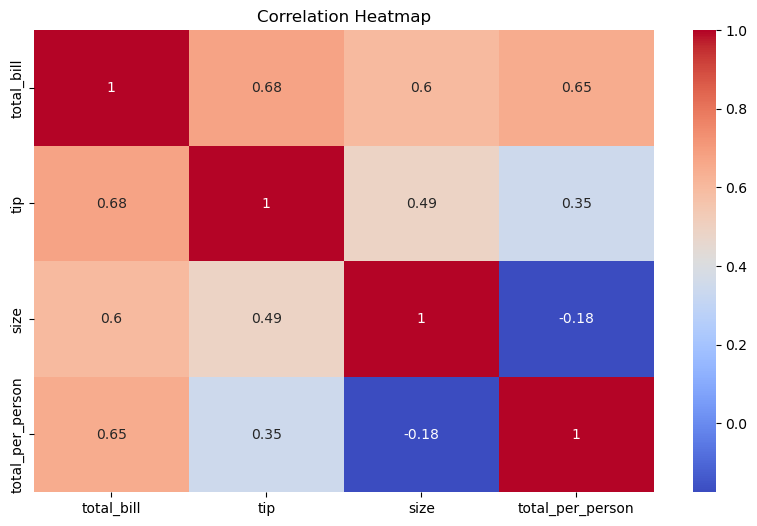

In [9]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Text(0, 0.5, 'Frequency')

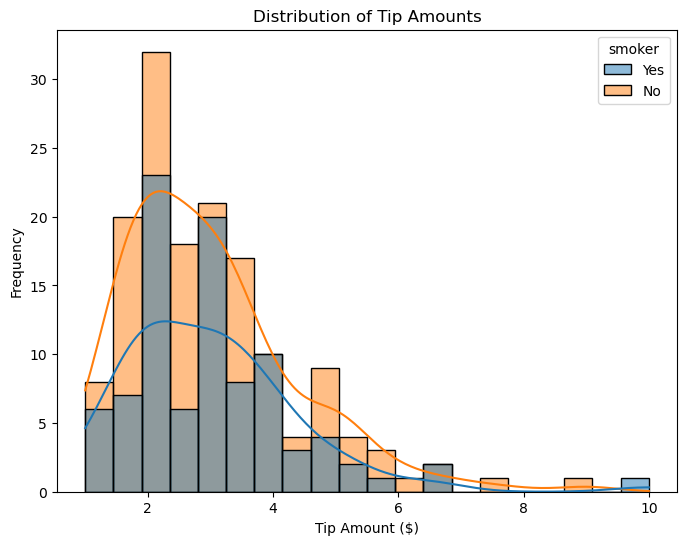

In [12]:
# Visualise the distribution of the tip amounts
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tip', bins=20, kde=True, color='green', hue='smoker')
plt.title('Distribution of Tip Amounts')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Tip Amount ($)')

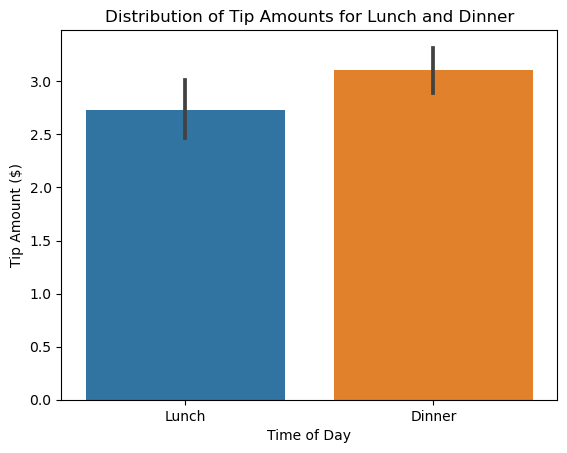

In [11]:
# Create a bar plot to visualise tip amounts for lunch and dinner
sns.barplot(x='time', y='tip', data=df)

# Customise plot aesthetics
plt.title('Distribution of Tip Amounts for Lunch and Dinner')
plt.xlabel('Time of Day')
plt.ylabel('Tip Amount ($)')

**Interpretations and Conclusion**

**Relationship between Total Bill per Person and Tip:**
The scatter plot reveals a positive correlation between the total bill per person and the tip amount. As the total bill per person increases, the tip amount tends to increase as well. The  regression line further highlights this trend, showing a general upward slope with confidence intervals.

**Pair Plot of Numerical Variables:**
The pair plot visualises relationships between numerical variables, with hue based on 'time' (lunch or dinner). It provides insights into how different variables are distributed and their correlations. The hue grouping by 'time' helps identify any patterns specific to meal times that might impact the numerical relationships.

**Correlation Heatmap:**
The correlation heatmap illustrates the correlations between numerical variables in the dataset. It helps identify potential relationships between variables, such as whether certain numerical features are positively or negatively correlated. For instance, 'total_bill' and 'tip' show a strong positive correlation, indicating that higher total bills tend to lead to higher tips.

**Distribution of Tip Amounts:**
The histogram showcases the distribution of tip amounts, indicating that tips are most commonly distributed around the lower values. The distribution appears slightly skewed to the right, with a few customers leaving considerably higher tips. This suggests that while most customers leave moderate tips, there are cases of more generous tipping.

**Distribution of Tip Amounts for Lunch and Dinner:**
The bar plot presents the distribution of tip amounts for lunch and dinner. While both meal times have a similar overall tip distribution, there might be subtle differences that could impact tipping behavior during different times of the day. Further analysis could delve into whether customers tip differently depending on when they dine.

In conclusion, this data analysis project explores various aspects of the 'tips' dataset using Python, pandas, and Seaborn. It provides insights into tipping behavior based on different variables. By visualising relationships and distributions, we've gained valuable insights into customer behavior when it comes to tipping at the restaurant.

**Smokers vs Non-Smokers**
The distributions of tip amounts for smokers and non-smokers appear quite similar, with the majority of tips falling within a similar range for both groups. Both groups show a similar spread indicating that smoking status may not have a substantial impact on the spread of tip values.